In [116]:
import pandas as pd
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

In [117]:
location_baseline = lambda on: f'data/CONTROL_BREATHING_RECORDINGS/OCHOTNIK_{on}/CLEAN_DATA_BASELINE/OCH_{on}_CLEAN_CB_BASELINE.csv'

In [118]:
def find_peaks(
    signal: np.array,
    sampling_rate: int = 200,
    mindelay: float = 0.3,
) -> np.array:
    # Fill missing values
    signal = nk.signal_fillmissing(signal)
    cleaned_signal = nk.ppg_clean(signal, sampling_rate=sampling_rate, method="elgendi")
    peaks_up = nk.ppg_findpeaks(
        cleaned_signal, sampling_rate=sampling_rate, method="elgendi", mindelay=mindelay
    )['PPG_Peaks']
    peaks_down = nk.ppg_findpeaks(
        cleaned_signal * -1, sampling_rate=sampling_rate, method="elgendi", mindelay=mindelay
    )['PPG_Peaks']
    peaks = np.sort(np.concatenate((peaks_up, peaks_down)))
    return peaks


In [119]:
def plot_signal_w_peaks(signal: np.array, peaks: np.array, start: int, end: int):
    plt.plot(signal[start:end])
    peaks = peaks[(peaks > start) & (peaks < end)]
    plt.scatter(peaks-start, signal[peaks], c='r')
    plt.ylim([np.min(signal-5), np.max(signal)+5])
    plt.show()

In [120]:
def plot_widnowed_signal_w_peaks(signal: np.array, peaks: np.array, n_windows: int):
    signal_widnowed = np.linspace(0, len(signal), n_windows+1).astype(int)
    for i in range(n_windows):
        plot_signal_w_peaks(signal, peaks, signal_widnowed[i], signal_widnowed[i+1])


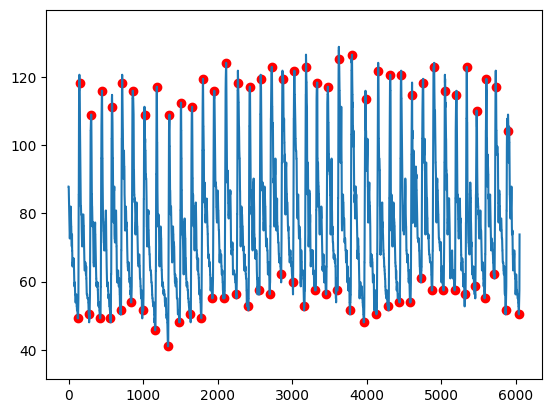

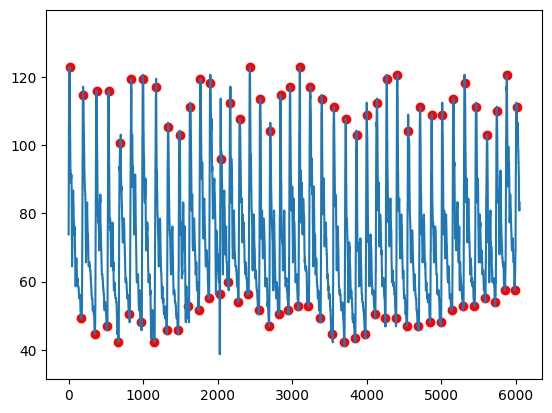

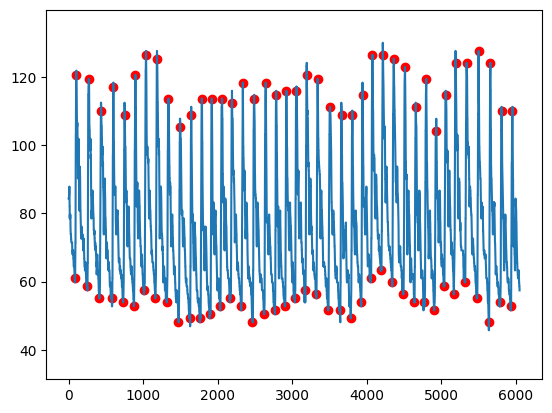

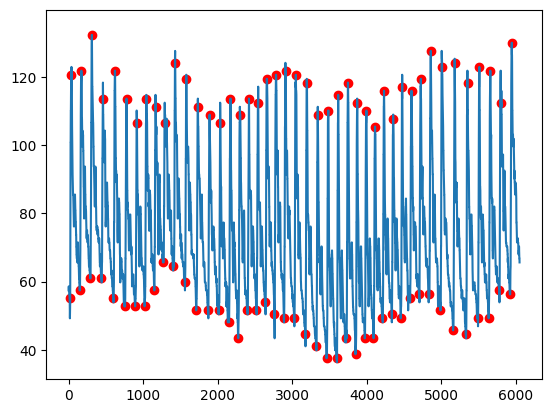

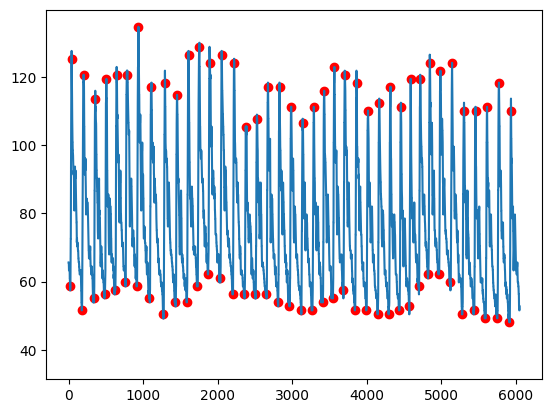

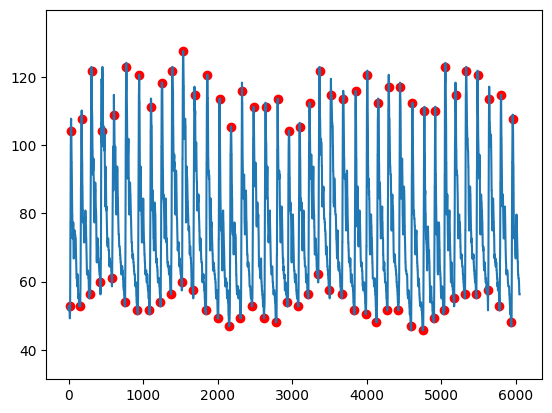

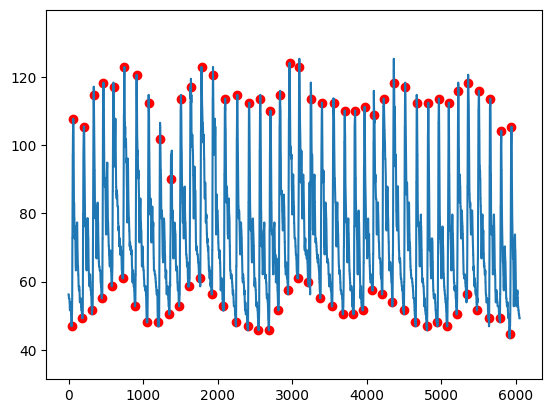

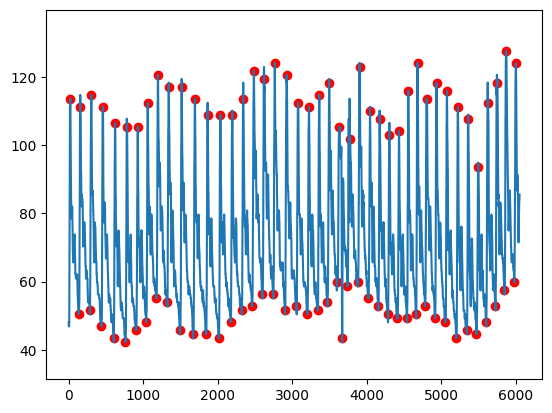

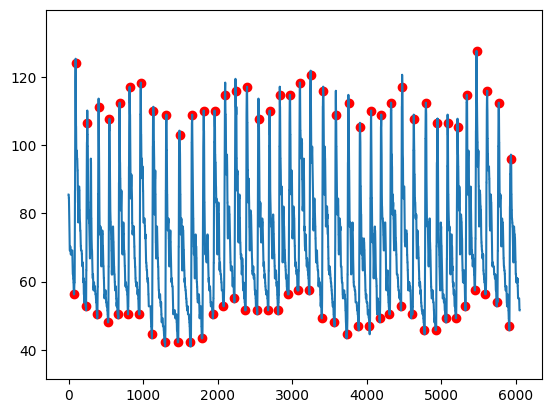

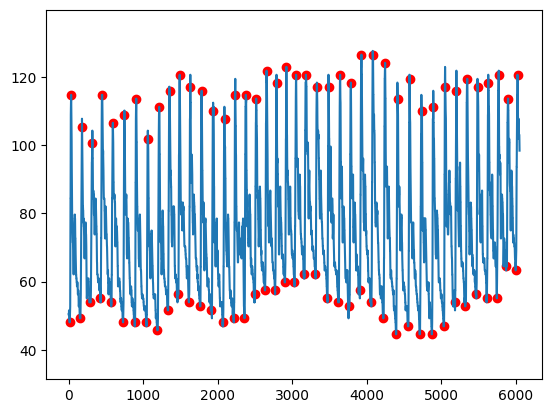

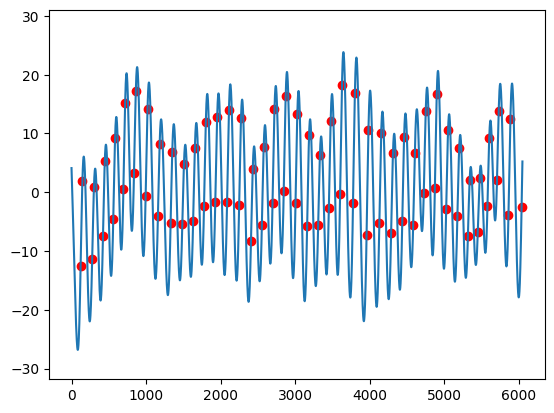

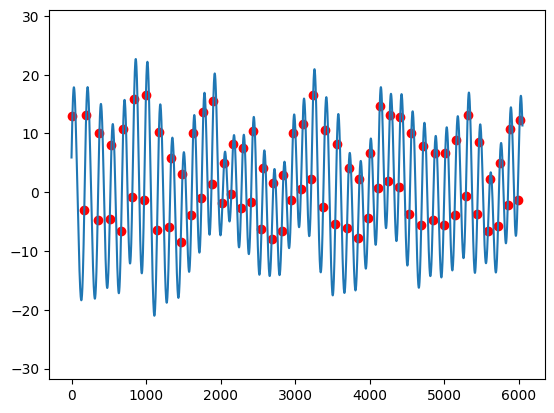

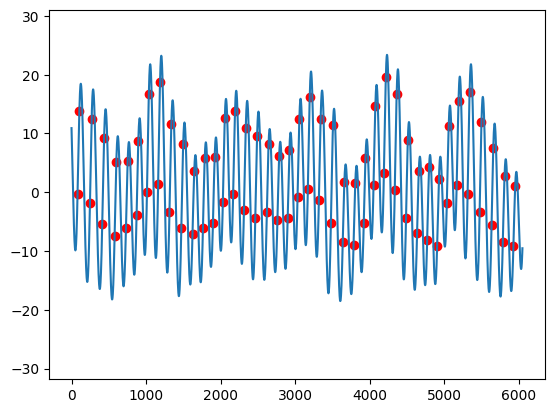

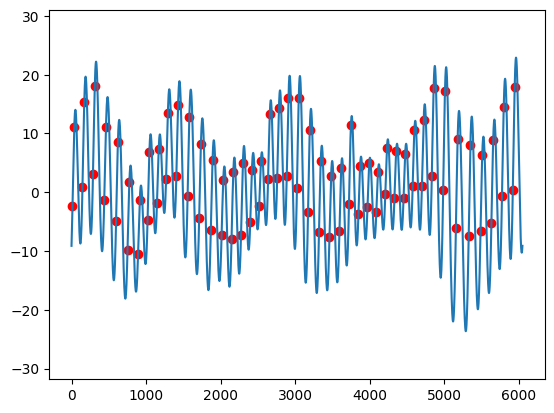

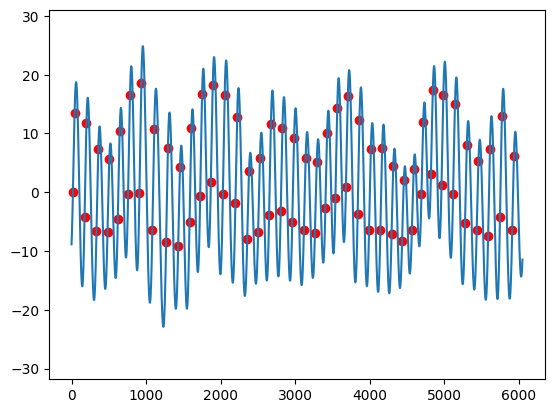

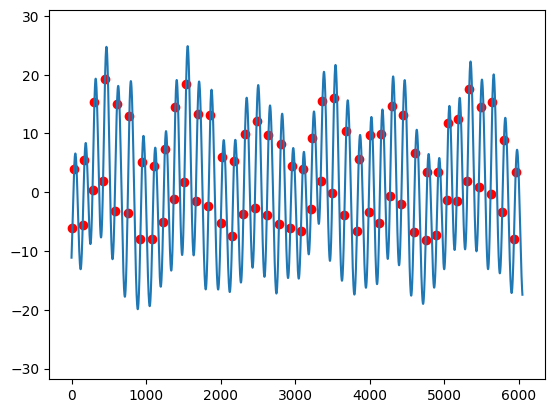

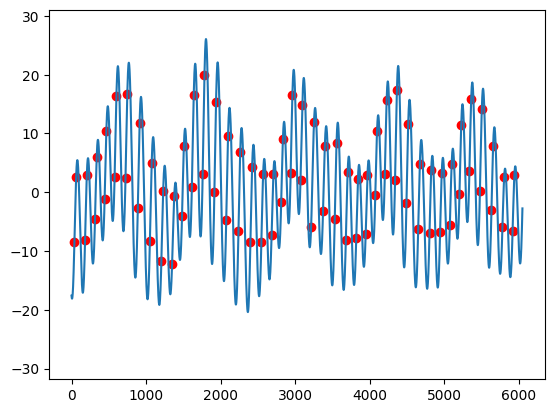

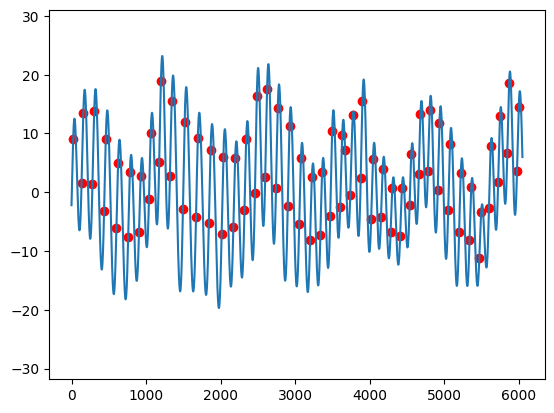

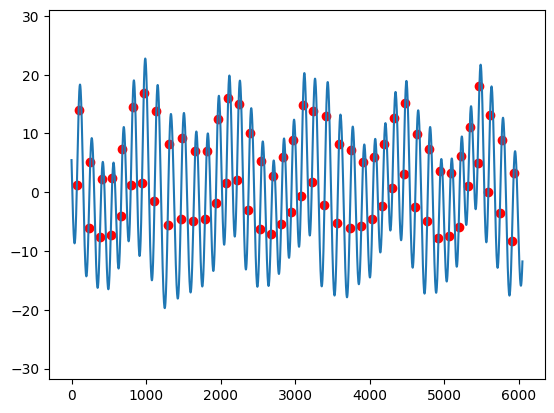

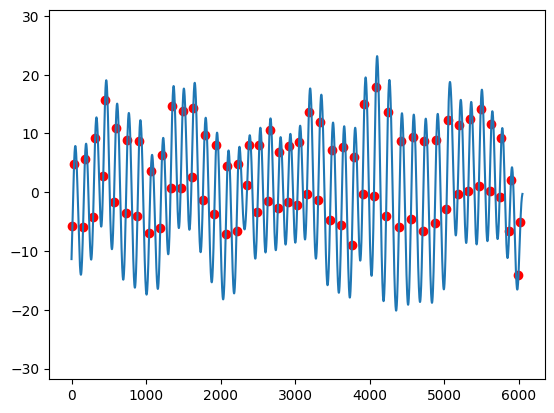

In [123]:
data = pd.read_csv(location_baseline(1), sep=';', decimal=',')['fvl'].values
peaks = find_peaks(data)
plot_widnowed_signal_w_peaks(data, peaks, 10)
plot_widnowed_signal_w_peaks(nk.ppg_clean(data), peaks, 10)